[0. 1.]
[  0 255]
score is  0.6460937912116896


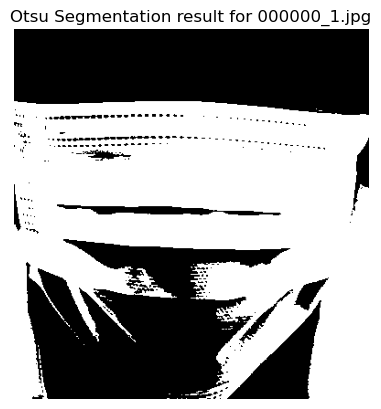

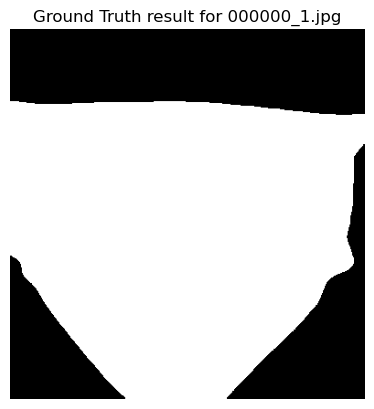

Jaccard Score for 000000_1.jpg: 0.6460937912116896
[0. 1.]
[  0 255]
score is  0.41498405951115835


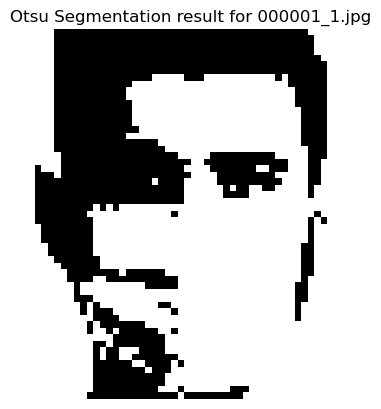

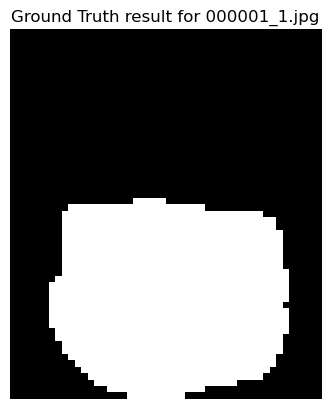

Jaccard Score for 000001_1.jpg: 0.41498405951115835
[0. 1.]
[  0 255]
score is  0.4043216752060593


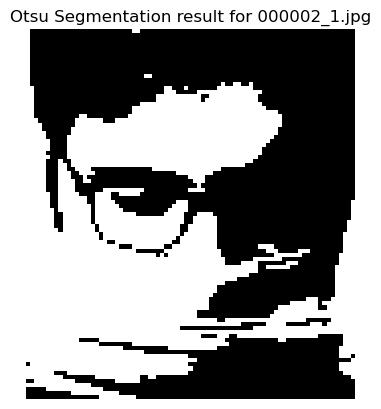

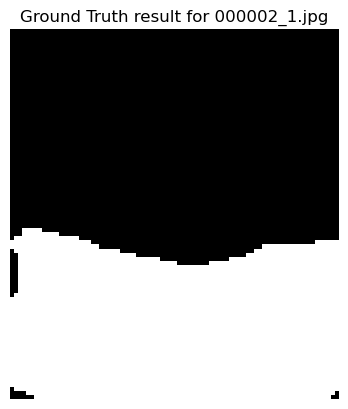

Jaccard Score for 000002_1.jpg: 0.4043216752060593
[0. 1.]
[  0 255]
score is  0.583363153559967


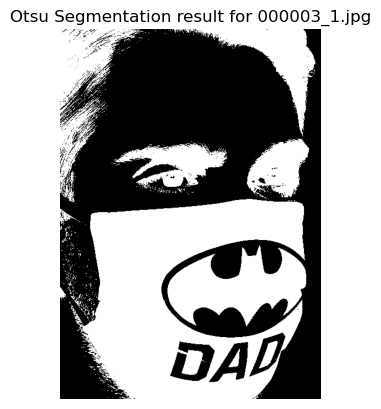

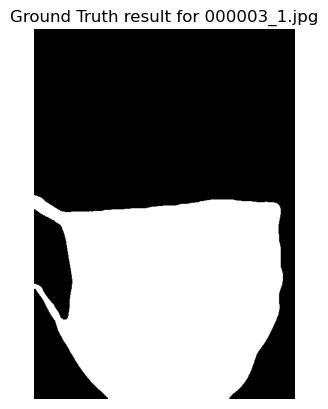

Jaccard Score for 000003_1.jpg: 0.583363153559967
[0. 1.]
[  0 255]
score is  0.25502008032128515


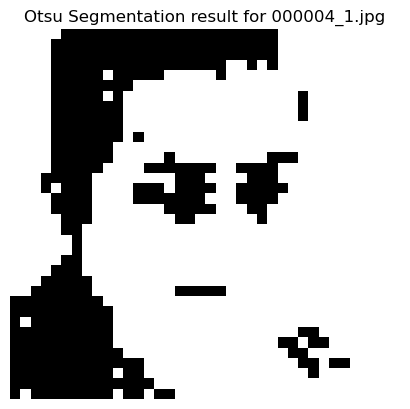

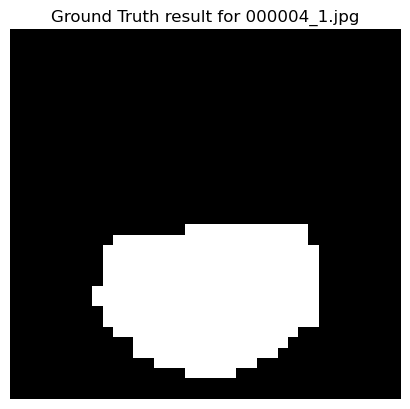

Jaccard Score for 000004_1.jpg: 0.25502008032128515
Average Jaccard score: 0.46075655196203186


In [11]:
import numpy as np
import cv2
from sklearn.metrics import jaccard_score
import os
from matplotlib import pyplot as plt

# Path to the dataset and segmentation results
path_to_data = '../../proj_try/dataset2/1/face_crop/'
path_to_segmented_op = '../../proj_try/dataset2/1/face_crop_segmentation/'
image_names = os.listdir(path_to_data)
image_names = sorted(image_names)
ans_names = os.listdir(path_to_segmented_op)
ans_names = sorted(ans_names)

def segment_image_threshold(img_name, ans_name, show=False, save=True):
    # Takes in one image and returns the segmented output i.e. seg and also returns the Jaccard score
    img = cv2.imread(path_to_data + img_name)
    seg = cv2.imread(path_to_segmented_op + ans_name)
    
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Do ostu
    ret, img_bin = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Process the segmentation mask (converting to binary)
    seg = seg.reshape(-1, 3)
    seg2 = np.zeros((seg.shape[0]))
    
    # Convert the segmented mask to binary (1 for mask, 0 for non-mask)
    for i in range(seg.shape[0]):
        val = seg[i][0]
        if abs(255 - val) < abs(val - 0):
            val = 1  # Mask area
        else:
            val = 0  # Non-mask area
        seg2[i] = val

    seg = seg2
    
    # Calculate Jaccard score (intersection over union) for both possible labelings
    print(np.unique(seg))
    print(np.unique(img_bin))
    img_bin2 = np.zeros_like(img_bin)
    img_bin2[img_bin == 255] = 1
    img_bin = img_bin2
    s1 = jaccard_score(y_true=seg.flatten(), y_pred=img_bin2.flatten())
    s2 = jaccard_score(y_true=seg.flatten(), y_pred=1 - img_bin2.flatten())
    
    # Choose the best Jaccard score
    score = max(s1, s2)
    print('score is ', score)
    # If necessary, flip the labels to match the mask region
    if s1 < s2:
        img_bin = 1 - img_bin
    
    # Show the results if required
    if show:
        plt.title('Otsu Segmentation result for ' + img_name)
        plt.axis('off')
        plt.imshow(img_bin, cmap='gray')
        plt.show()
        plt.close()

        plt.title('Ground Truth result for ' + ans_name)
        plt.axis('off')
        plt.imshow(seg.reshape(img.shape[:2]), cmap='gray')
        plt.show()
        plt.close()

    # Save the results to a file if required
    if save:
        plt.title('Otsu Segmentation result for ' + img_name)
        plt.axis('off')
        plt.imshow(img_bin, cmap='gray')
        plt.savefig(f'./output/otsu/{img_name}')
        plt.close()

    return (seg.reshape(img.shape[:2]), score)

# Calculate average Jaccard score over a set of images
tot = 0
count = 5
for i in range(0, count):
    seg_pred, score = segment_image_threshold(image_names[i], ans_names[i], show=True, save=False)
    print(f"Jaccard Score for {image_names[i]}: {score}")
    tot += score

print('Average Jaccard score:', tot / count)
